# 1. Предсказание цены на недвижимость

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся одним из них: загрузим данные по ценам на дома в разных районах Бостона. В X окажутся разные признаки домов, описания которых можно прочитать ниже, а в целевой переменной y - цена на такое жильё. Именно её и мы постараемся предсказывать

In [2]:
import pandas as pd
from sklearn.datasets import load_boston

In [3]:
print(load_boston()['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston_data = load_boston()
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

In [5]:
print(boston_data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


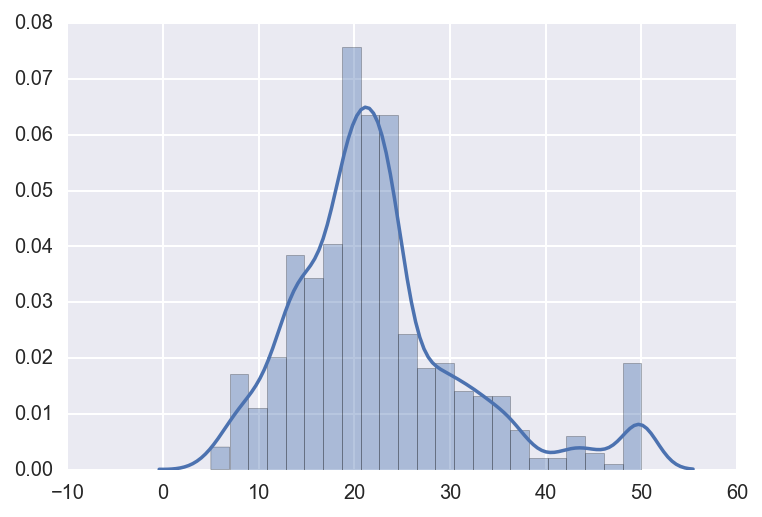

In [7]:
sns.distplot(y)

### Формирование выборок

разделим данные на 2 части: обучающую и тренировочную выборки

In [8]:
train_share = 0.8

In [9]:
X = X / X.sum(axis=0)

In [10]:
train_size = int(train_share * X.shape[0])
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

### Построение регрессии и предсказания по тестовой выборке

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
regression = LinearRegression()

In [13]:
regression.fit(X_train, y_train)

/Applications/Utilities/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = regression.predict(X_test)

можно посмотреть наиболее значимые в одну или другую сторону фичи:

In [15]:
print("\n".join(["{:10} {:.3f}".format(x, y) for y, x in sorted(zip(regression.coef_, boston_data.feature_names))]))

PTRATIO    -7579.429
NOX        -4189.969
LSTAT      -3407.854
TAX        -3210.783
DIS        -2496.864
CRIM       -367.572
B          -355.855
CHAS       65.966
AGE        100.188
ZN         253.734
INDUS      296.829
RAD        2230.751
RM         15138.149


### Визуальная оценка

пока не численно, но просто визуально оценим, насколько качественно идёт предсказание

In [16]:
import numpy as np

идеальный случай: прямая под 45 градусов

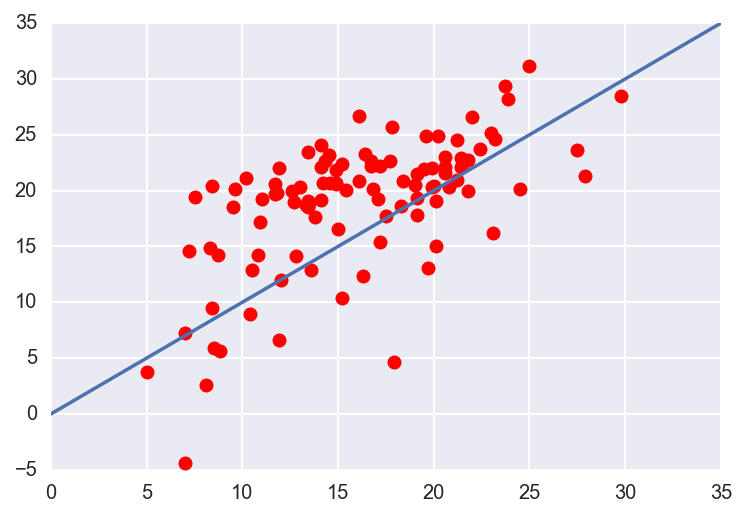

In [17]:
plt.plot(y_test, y_pred, 'ro');
plt.plot([0, 35], [0, 35]);

''

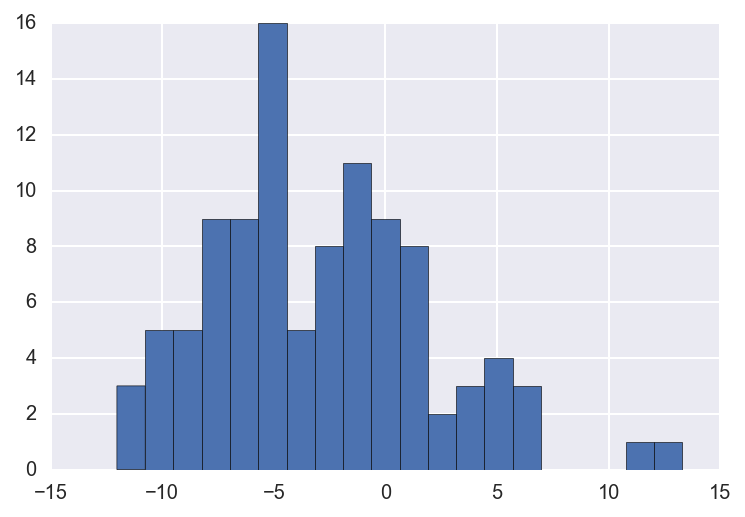

In [18]:
plt.hist(y_test-y_pred, bins=20)
''

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report([int(i/10) for i in y_test], [int(i/10) for i in y_pred]))

             precision    recall  f1-score   support

          0       0.70      0.50      0.58        14
          1       0.75      0.44      0.55        62
          2       0.38      0.81      0.52        26
          3       0.00      0.00      0.00         0

avg / total       0.65      0.54      0.55       102



/Applications/Utilities/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### MSE

In [21]:
mse = np.mean((y_test-y_pred)**2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(y_test-y_pred)))

mse 33.075626492276044
sqrt(mse) 5.751141320840242
avg_error 4.749834436959673
